In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

10.1. Охоплення об'єкта повернутим прямокутником

In [3]:
img = cv2.imread(r'E:\KHPI\Computer Vision\Lab_10\pics\12.jpg', 0)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, 1, 1)
cnt = contours[0]

rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)

img = cv2.drawContours(img, [box], 0, (0, 0, 255), 2)
cv2.imshow('Rectangle', img)
cv2.waitKey(0)

-1

10.2. Укладання зображення в коло з мінімальною площею

In [4]:
img = cv2.imread(r'E:\KHPI\Computer Vision\Lab_10\pics\12.jpg', 0)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, 1, 1)
cnt = contours[0]

(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)

# Малюємо це коло на оригінальному кольоровому зображенні
img = cv2.circle(img, center, radius, (0, 255, 0), 2)

# Відображаємо зображення з намальованими колами
cv2.imshow('Circle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

10.3. Укладання зображення в еліпс з мінімальною площею

In [7]:
img = cv2.imread(r'E:\KHPI\Computer Vision\Lab_10\pics\12.jpg', 0)

ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, 1, 1)
cnt = contours[0]

ellipse = cv2.fitEllipse(cnt)


major_axis_increase = 55
minor_axis_increase = 55
new_ellipse = (
    (ellipse[0][0], ellipse[0][1]),  # Центр остается тем же
    (ellipse[1][0] + major_axis_increase, ellipse[1][1] + minor_axis_increase),  # Увеличение полуосей
    ellipse[2]  # Угол остается тем же
)

image = cv2.ellipse(img, new_ellipse, (0, 255, 0), 2)
cv2.imshow("Ellips", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Завдання 10.4. Провести пряму лінію вздовж осі симетрії зображення.

In [6]:
img = cv2.imread(r'E:\KHPI\Computer Vision\Lab_10\pics\12.jpg', 0)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
inv = cv2.bitwise_not(thresh)
cv2.imshow('image', img)

contours, hierarchy = cv2.findContours(inv, 1, 1)
cnt = contours[0]
rows, cols = inv.shape[:2]
[vx, vy, x, y] = cv2.fitLine(cnt, cv2.DIST_L2, 0, 0.01, 0.01)
lefty = int((-x * vy / vx) + y)
righty = int(((cols - x) * vy / vx) + y)
img = cv2.line(img, (cols - 1, righty), (0, lefty), (0, 255, 0), 2)
cv2.imshow('Line', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

10.5. Створення опуклої оболонки навколо контуру

In [8]:
image = cv2.imread(r'E:\KHPI\Computer Vision\Lab_10\pics\12.jpg', 0)
original_image = image
edges = cv2.Canny(image, 50, 200)
contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    hull = cv2.convexHull(cnt)
    cv2.drawContours(original_image, [hull], 0, (0, 255, 0), 2)

cv2.imshow('Shell', original_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

10.6. Апроксимація контуру

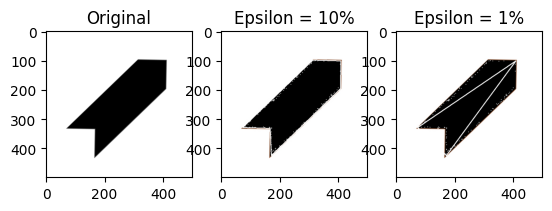

In [35]:
img = cv2.imread(r'E:\KHPI\Computer Vision\Lab_10\pics\12.jpg', 0)
ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 2, 3)
imag = cv2.imread(r'E:\KHPI\Computer Vision\Lab_10\pics\12.jpg')
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(img, 'gray')
plt.subplot(1, 3, 2)
plt.title('Epsilon = 10%')
for i in range(len(contours)):  # Use len() to get the number of contours
    cnt = contours[i]
    epsilon = 0.01 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(imag, [approx], -1, (255, 255, 255), 2)
plt.imshow(imag)
plt.subplot(1, 3, 3)
plt.title('Epsilon = 1%')
imAg = cv2.imread(r'E:\KHPI\Computer Vision\Lab_10\pics\12.jpg')
for i in range(len(contours)):  # Use len() to get the number of contours
    cnt = contours[i]
    epsilon = 0.1 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(imAg, [approx], -1, (255, 255, 255), 2)
plt.imshow(imAg)
plt.show()